<a href="https://colab.research.google.com/github/TrangNguyen1004/Advanced-Programming-in-Finance/blob/master/Advanced_Programming_in_Finance_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [0]:
import numpy as np
import pandas as pd

import math

import io, os, sys

In [14]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import GRU
from keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


# Data

## Import Data

In [0]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [0]:
my_path = "/content/gdrive/My Drive/Advance Programming in Finance/"
data_path = os.path.join(my_path, 'GS.csv')

In [22]:
dataset = pd.read_csv(data_path, header = 0, parse_dates = [0], date_parser = parser, index_col = ['Date'])
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,167.289993,170.130005,166.929993,168.839996,148.727570,6401800
2010-01-04,170.050003,174.250000,169.509995,173.080002,152.462524,9135000
2010-01-05,173.000000,176.259995,172.570007,176.139999,155.158005,11659400
2010-01-06,175.380005,175.380005,173.759995,174.259995,153.501953,7381100
2010-01-07,174.320007,178.750000,173.949997,177.669998,156.505737,8727400


In [25]:
input_data = dataset.iloc[:, 0:4]
input_data.head()

,Open,High,Low,Close
Date,,,,
2009-12-31,167.289993,170.130005,166.929993,168.839996
2010-01-04,170.050003,174.250000,169.509995,173.080002
2010-01-05,173.000000,176.259995,172.570007,176.139999
2010-01-06,175.380005,175.380005,173.759995,174.259995
2010-01-07,174.320007,178.750000,173.949997,177.669998


In [30]:
# preparing label data

input_shift = input_data.shift(-1)
label_data = input_shift['Close']
label_data.head()

Date
2009-12-31    173.080002
2010-01-04    176.139999
2010-01-05    174.259995
2010-01-06    177.669998
2010-01-07    174.309998
Name: Close, dtype: float64

In [0]:
# adjusting the shape of both

input_data.drop(input_data.index[len(input_data) - 1], axis = 0, inplace = True)
label_data.drop(label_data.index[len(label_data) - 1], axis = 0, inplace = True)

In [32]:
input_data.head()

,Open,High,Low,Close
Date,,,,
2009-12-31,167.289993,170.130005,166.929993,168.839996
2010-01-04,170.050003,174.250000,169.509995,173.080002
2010-01-05,173.000000,176.259995,172.570007,176.139999
2010-01-06,175.380005,175.380005,173.759995,174.259995
2010-01-07,174.320007,178.750000,173.949997,177.669998


In [0]:
x, y = input_data.values, label_data.values

In [0]:
# scaling values for model

x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y.reshape(-1, 1))

In [0]:
# splitting train and test

test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size)
X_train = X_train.reshape((-1,1,4))
X_test = X_test.reshape((-1,1,4))


# Model Gated Recurrant Units

In [38]:
# creating model using Keras

model_name = 'stock_price_GRU'

model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(1, 4)))
model.add(Dropout(0.2))
model.add(GRU(units=256))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

model.fit(X_train,y_train,batch_size=250, epochs=500, validation_split=0.1, verbose=1)
model.save("{}.h5".format(model_name))
print('MODEL-SAVED')


W0716 11:28:11.209820 139837458454400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 11:28:11.262386 139837458454400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 11:28:11.271606 139837458454400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 11:28:11.933640 139837458454400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 11:28:11.944324 

Train on 1503 samples, validate on 168 samples
Epoch 1/500
1503/1503 [==============================] - 2s 2ms/step - loss: 0.0486 - val_loss: 0.0453
Epoch 2/500
1503/1503 [==============================] - 1s 406us/step - loss: 0.0408 - val_loss: 0.0334
Epoch 3/500
1503/1503 [==============================] - 1s 423us/step - loss: 0.0306 - val_loss: 0.0211
Epoch 4/500
1503/1503 [==============================] - 1s 416us/step - loss: 0.0160 - val_loss: 0.0076
Epoch 5/500
1503/1503 [==============================] - 1s 430us/step - loss: 0.0041 - val_loss: 0.0017
Epoch 6/500
1503/1503 [==============================] - 1s 407us/step - loss: 0.0015 - val_loss: 0.0022
Epoch 7/500
1503/1503 [==============================] - 1s 416us/step - loss: 0.0023 - val_loss: 0.0019
Epoch 8/500
1503/1503 [==============================] - 1s 416us/step - loss: 0.0016 - val_loss: 0.0010
Epoch 9/500
1503/1503 [==============================] - 1s 408us/step - loss: 9.2516e-04 - val_loss: 8.2376e-04
Ep

# Visualize

717/717 [==============================] - 0s 259us/step
Score: 0.0003600057055868437


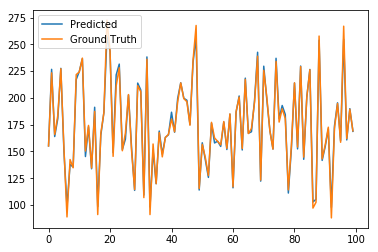

In [39]:
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))
yhat = model.predict(X_test)
yhat = y_scale.inverse_transform(yhat)
y_test = y_scale.inverse_transform(y_test)
plt.plot(yhat[-100:], label='Predicted')
plt.plot(y_test[-100:], label='Ground Truth')
plt.legend()
plt.show()